In [248]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


##### kaggle link: https://www.kaggle.com/code/anishwarbehera/diabetes-predication-random-forest-96-accuracy

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [250]:
df=pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [251]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [252]:
df.shape

(100000, 9)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [254]:
df.isnull().sum()#no NULL values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [255]:
dup=df.duplicated().sum()
dup
#we have 3854 duplicate values 

3854

# EDA

In [256]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64


80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64


0    92515
1     7485
Name: hypertension, dtype: int64


0    96058
1     3942
Name: heart_disease, dtype: int64


No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64


6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: HbA1c_level, dtype: int6

<Axes: xlabel='diabetes', ylabel='count'>

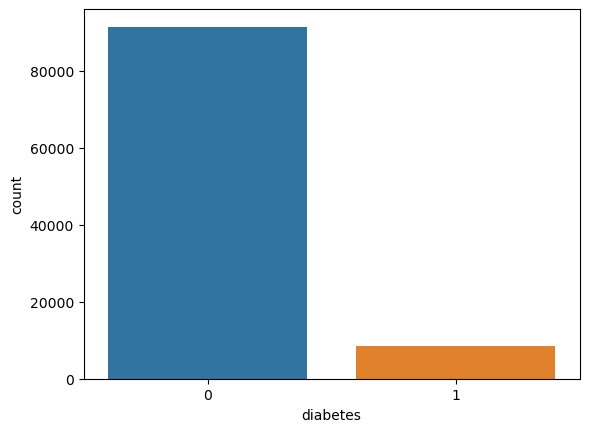

In [257]:
sns.countplot(x='diabetes',data=df)#imbalace dataset

<Axes: title={'center': 'Gender Distribution'}, xlabel='gender', ylabel='count'>

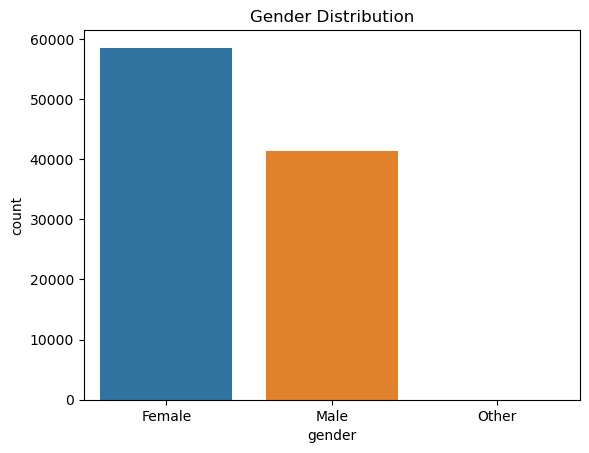

In [258]:
plt.title('Gender Distribution')
sns.countplot(x='gender',data=df)
#we got more Females than Male

<Axes: xlabel='diabetes', ylabel='count'>

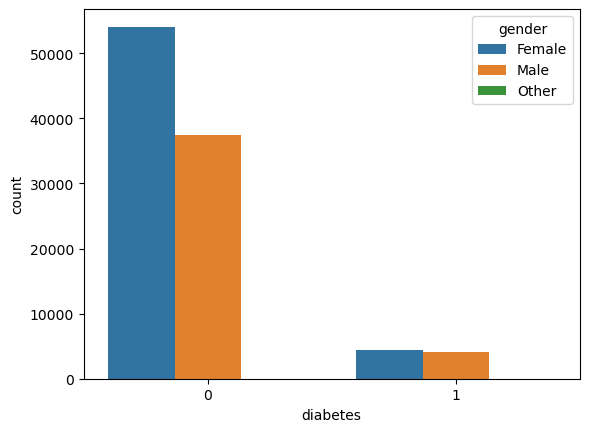

In [259]:
sns.countplot(x='diabetes',data=df,hue='gender')
#gender=other have no diabetes patient

<Axes: xlabel='diabetes', ylabel='age'>

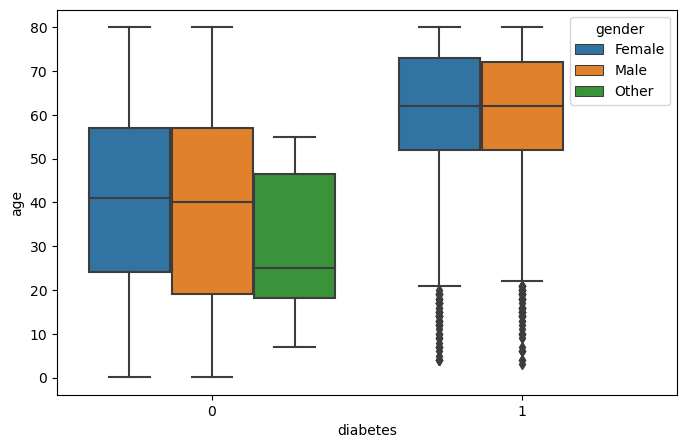

In [260]:
plt.figure(figsize=(8,5))
sns.boxplot(y='age',x='diabetes',hue='gender',data=df)

In [261]:
for i in df['gender'].value_counts().keys():
    total=df[df['gender']==i].shape[0]
    diabetes=df[(df['gender']==i)&(df['diabetes']==1)].shape[0]
    pre=round((diabetes/total)*100,5)
    print(f"Total no. of {i} is {total} out of them {pre}% have diabetes that is {diabetes} no. of {i} \n")

Total no. of Female is 58552 out of them 7.61887% have diabetes that is 4461 no. of Female 

Total no. of Male is 41430 out of them 9.74897% have diabetes that is 4039 no. of Male 

Total no. of Other is 18 out of them 0.0% have diabetes that is 0 no. of Other 



<Axes: xlabel='age', ylabel='Count'>

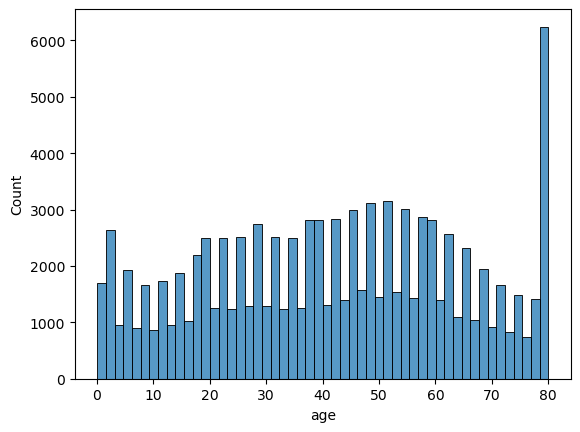

In [262]:
sns.histplot(x='age',data=df)
#Around 6200 people are 80 years old

In [263]:
diabetes_yes=df[df['diabetes']==1].shape[0]
aged=df[(df['age']>60) & (df['diabetes']==1)].shape[0]
per=round((aged/diabetes_yes)*100,1)
print(f"total diabetes patients is {diabetes_yes}, {per}% are over the age of 60" )

# Diabetes is a common health issue among old people

total diabetes patients is 8500, 55.5% are over the age of 60


Text(0.5, 1.0, ' Age vs Diabetes')

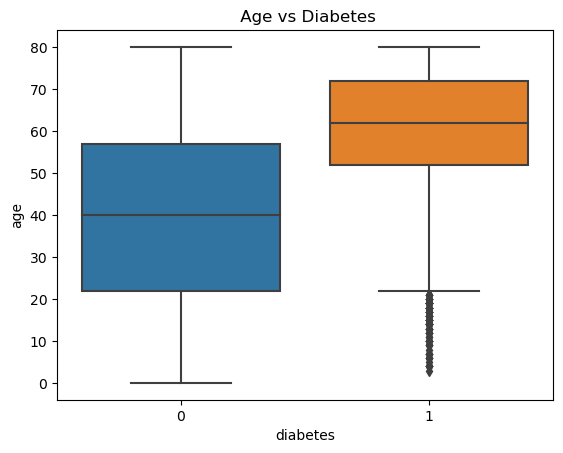

In [264]:
sns.boxplot(x='diabetes',y='age',data=df)
plt.title(' Age vs Diabetes')
#Old people have diabetes

<Axes: xlabel='hypertension', ylabel='count'>

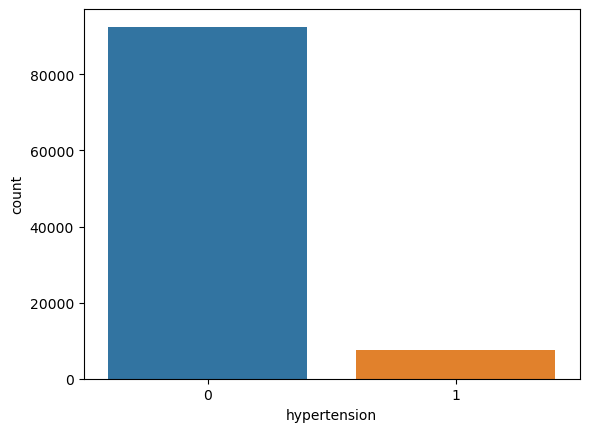

In [265]:
sns.countplot(x='hypertension',data=df)

Text(0.5, 1.0, 'Hypertension')

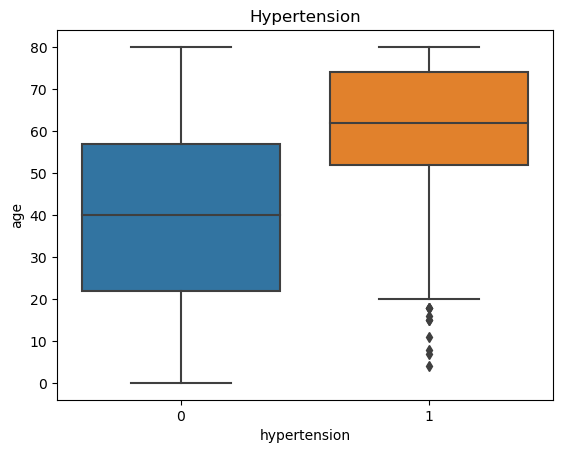

In [266]:
sns.boxplot(x='hypertension',y='age',data=df)
plt.title('Hypertension')

#Old people tend to have hypertension

In [267]:
mid_age_hyper=df[(df['age']>30) & (df['age']<50) &(df['hypertension']==1)].shape[0]
mid=df[(df['age']>30) & (df['age']<50)].shape[0]
print(mid_age_hyper/mid*100)
#only 5% of mid age people have hypertension

5.017268207522107


In [268]:
old_age_hyper=df[(df['age']>60) &(df['hypertension']==1)].shape[0]
old=df[(df['age']>60)].shape[0]
print(old_age_hyper/old*100)
#17% of old age people have hypertension

17.52708192281652


In [269]:
for i in ['Female','Male']:
    val=(df[(df['gender']==i) & (df['hypertension']==1)].shape[0])/df.shape[0]*100
    print(f"{round(val,2)}% of {i} have hypertension")
    
#There's the same level of hypertension in both genders

4.2% of Female have hypertension
3.29% of Male have hypertension


Text(0.5, 1.0, 'BMI Distribution')

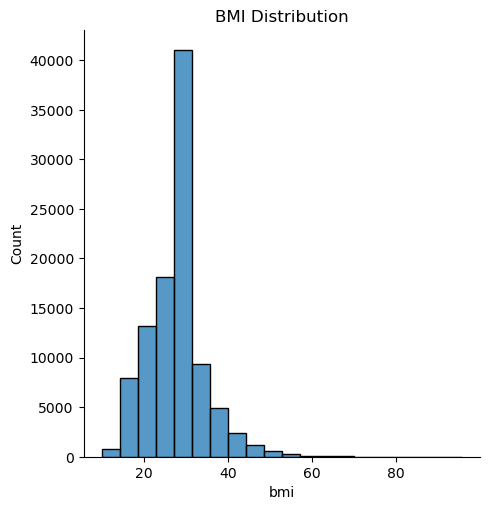

In [270]:
sns.displot(df['bmi'],bins=20)
plt.title('BMI Distribution')


<Axes: xlabel='heart_disease', ylabel='count'>

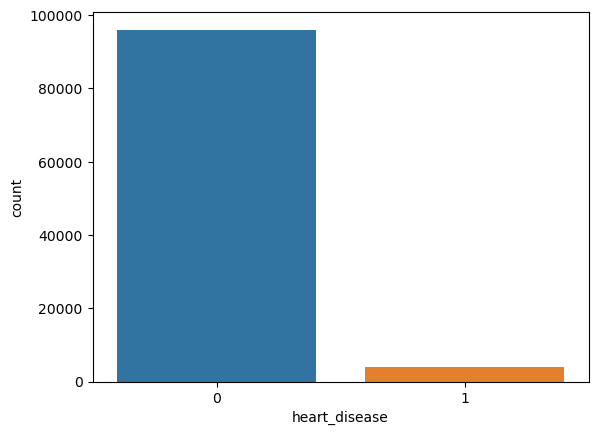

In [271]:
sns.countplot(x='heart_disease',data=df)

In [272]:
mid_age_heart=df[(df['age']>30) & (df['age']<50) &(df['heart_disease']==1)].shape[0]
mid=df[(df['age']>30) & (df['age']<50)].shape[0]
print(mid_age_heart/mid*100)
#only 0.95% of mid age people have heart_disease

0.9525978215492049


In [273]:
old_age_heart=df[(df['age']>60) &(df['hypertension']==1)].shape[0]
old=df[(df['age']>60)].shape[0]
print(old_age_heart/old*100)
#17% of old age people have hypertension

17.52708192281652


Text(0.5, 1.0, 'Smoking History Distribution')

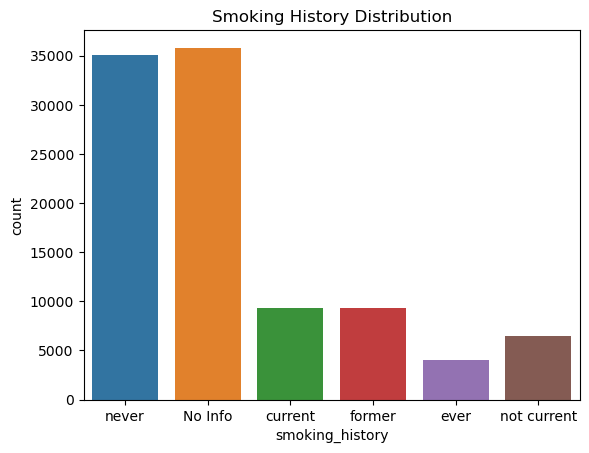

In [274]:
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')

Text(0.5, 1.0, 'Smoking')

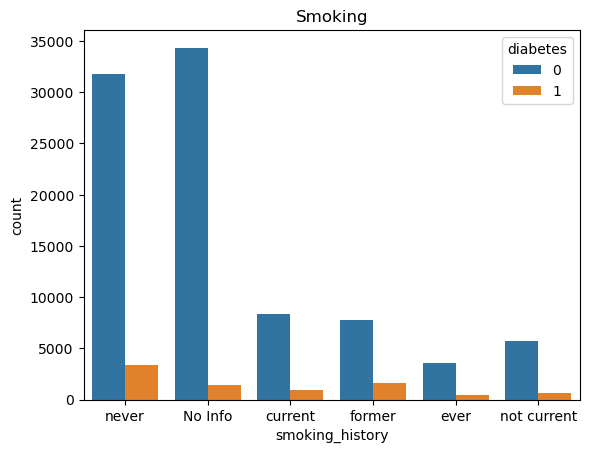

In [275]:
sns.countplot(x='smoking_history',hue='diabetes',data=df)
plt.title('Smoking')
# I don't think smoking really affects diabetes based on this distribution

In [276]:
for i in ['No Info', 'never', 'former', 'current', 'not current', 'ever']:
  total=df['smoking_history'].value_counts()[i]
  num=df[(df['smoking_history']==i) & (df['diabetes']==1)].shape[0]
  print(f"No of patents with smoking history: {i} is {total} and having diabetes is: {num}, percentage {(num/total)*100}")
  print('\n')

No of patents with smoking history: No Info is 35816 and having diabetes is: 1454, percentage 4.059638150547242


No of patents with smoking history: never is 35095 and having diabetes is: 3346, percentage 9.534121669753526


No of patents with smoking history: former is 9352 and having diabetes is: 1590, percentage 17.001710863986315


No of patents with smoking history: current is 9286 and having diabetes is: 948, percentage 10.208916648718501


No of patents with smoking history: not current is 6447 and having diabetes is: 690, percentage 10.702652396463472


No of patents with smoking history: ever is 4004 and having diabetes is: 472, percentage 11.78821178821179




Text(0.5, 1.0, 'HbA1c level vs Diabetes')

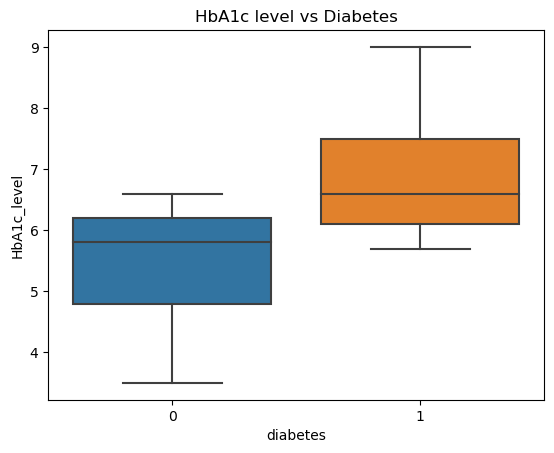

In [277]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
#Those who have diabetes have a higher hemoglobin label than normal people.

Text(0.5, 1.0, 'Blood Glucose Level vs Diabetes')

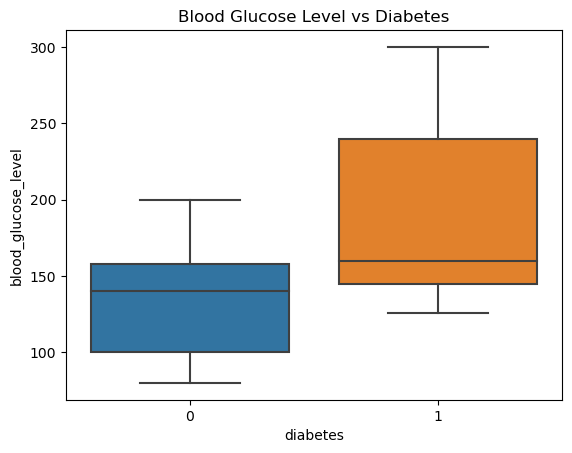

In [278]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')

<Axes: >

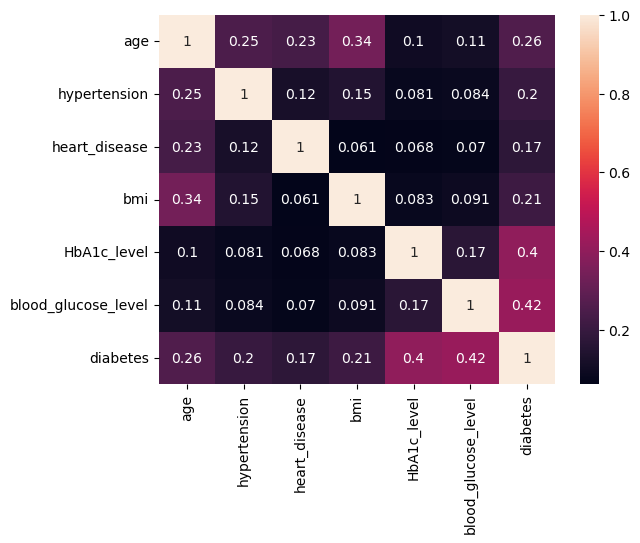

In [279]:
c=df.corr()
sns.heatmap(c,annot=True)

<Axes: >

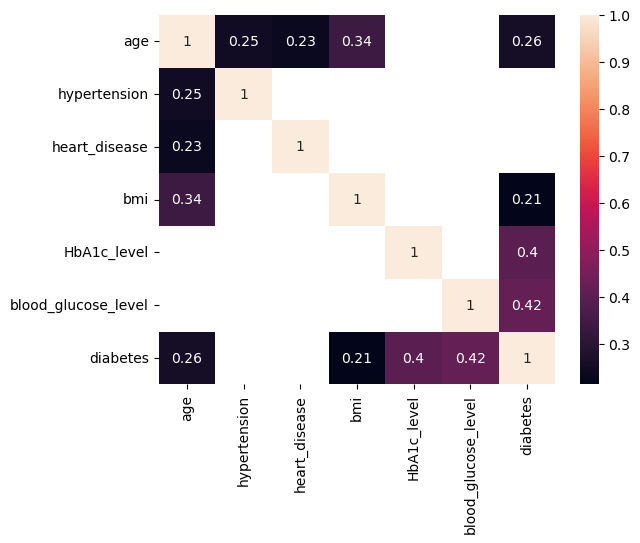

In [280]:
sns.heatmap(c[(c>=0.2) & (c>-0.2)],annot=True)

In [281]:
df['gender']=df['gender'].map({'Female':0,'Male':1,'Other':2})
df.drop('smoking_history',axis=1,inplace=True)#droping because too much data is missing(No Info) and smoking_history not affecting the target column that much

# Scaling

In [282]:
from sklearn.preprocessing import StandardScaler

In [283]:
sc=StandardScaler()
d=sc.fit_transform(df[['age','HbA1c_level','blood_glucose_level']])
df.drop(['age','HbA1c_level','blood_glucose_level'],axis=1,inplace=True)
d2=pd.DataFrame(d,columns=['age','HbA1c_level','blood_glucose_level'])
final=pd.concat([d2,df],axis=1)

In [284]:
final.head()

,age,HbA1c_level,blood_glucose_level,gender,hypertension,heart_disease,bmi,diabetes
0,1.692704,1.001706,0.047704,0,0,1,25.19,0
1,0.538006,1.001706,-1.426210,0,0,0,27.32,0
2,-0.616691,0.161108,0.489878,1,0,0,27.32,0
3,-0.261399,-0.492690,0.416183,0,0,0,23.45,0
4,1.515058,-0.679490,0.416183,1,1,1,20.14,0


# Model Building

In [285]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [286]:
x=final.drop('diabetes',axis=1)
y=final['diabetes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='diabetes', ylabel='count'>

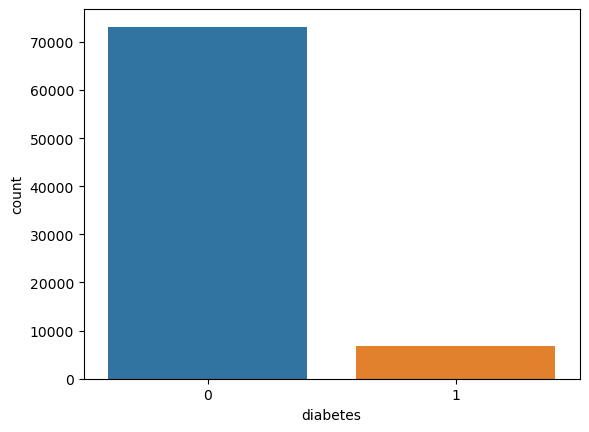

In [287]:
sns.countplot(x=y_train)

In [288]:
sm=SMOTE(sampling_strategy=0.3)
us=RandomUnderSampler(sampling_strategy=0.4)
x_train,y_train=sm.fit_resample(x_train,y_train)
x_train,y_train=us.fit_resample(x_train,y_train)

<Axes: xlabel='diabetes', ylabel='count'>

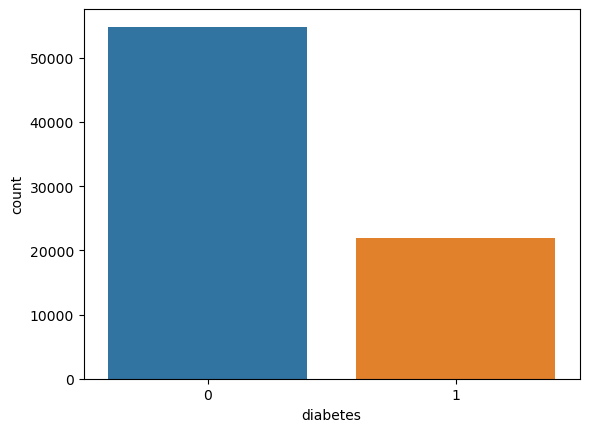

In [289]:
sns.countplot(x=y_train)

In [290]:
models = {
    "Logistic regression":LogisticRegression(),
    "Tree ":DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(),
    "xg":xgb.XGBClassifier()
}
for name,model in models.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)  
    print("Model: " , name)
    print("------------------------------")    
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Logistic regression
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     18346
           1       0.58      0.79      0.67      1654

    accuracy                           0.94     20000
   macro avg       0.78      0.87      0.82     20000
weighted avg       0.95      0.94      0.94     20000

.........................................................|
Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18346
           1       0.65      0.77      0.71      1654

    accuracy                           0.95     20000
   macro avg       0.82      0.86      0.84     20000
weighted avg       0.95      0.95      0.95     20000

.........................................................|
Model:  RandomForest
------------------------------
              precision    recall  f1-score   support

           0     

In [291]:
m=xgb.XGBClassifier()
params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
        }
grid= GridSearchCV(m, params, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
0.9649666670488596


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18346
           1       0.92      0.70      0.80      1654

    accuracy                           0.97     20000
   macro avg       0.95      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Axes(0.125,0.11;0.62x0.77)


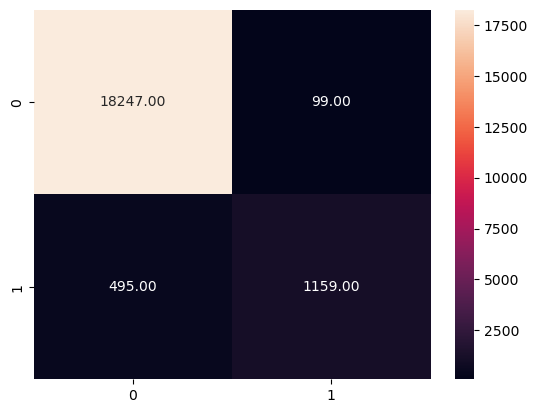

In [292]:
p = grid.predict(x_test)  
print(classification_report(y_test,p))
print(sns.heatmap(confusion_matrix(y_test,p),annot=True,fmt="0.2f"))

In [293]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,  cv = 5 )
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
0.9616335371845797


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18346
           1       0.80      0.73      0.76      1654

    accuracy                           0.96     20000
   macro avg       0.89      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000

Axes(0.125,0.11;0.62x0.77)


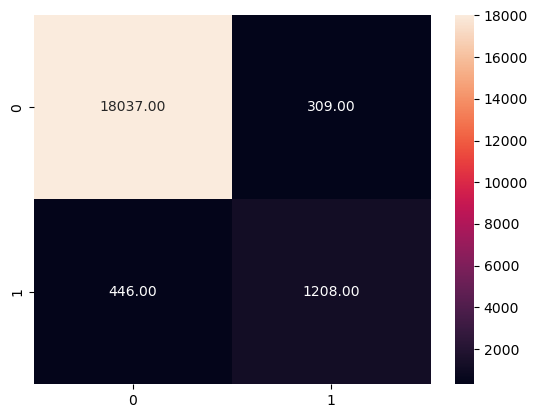

In [294]:
p = grid_search.predict(x_test)  
print(classification_report(y_test,p))
print(sns.heatmap(confusion_matrix(y_test,p),annot=True,fmt="0.2f"))